<a href="https://colab.research.google.com/github/Nadezda-Sut/statistics_in_science/blob/main/Exploring_factor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML


In [2]:
#link google colab and google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# path to file in google drive

file_path = "/content/gdrive/My Drive/Colab Notebooks/qqqqq.csv"
data = pd.read_csv(file_path)
data

,Студенты/школьники,Иниц.стиль,Крит.стиль,Упр.стиль,Практ.стиль,Ф.внимания,К.атрибуция,Тол. к противор.,В.изменений,Общий пок. А/Х,...,"5. Просмотр научно-популярных и художественных фильмов, которые нужны для учебы","6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",пол,возраст,Оценки в этом году
0,0,21,21,21,18,14,6,16,36,72,...,5,5,5,5,5,5,5,1,12,2
1,0,18,21,18,17,24,29,16,27,96,...,5,5,5,5,5,5,5,1,12,3
2,0,19,25,16,24,25,25,24,24,98,...,5,5,5,5,5,5,5,1,13,2
3,0,19,22,18,17,24,24,24,26,98,...,5,1,5,1,4,2,2,1,13,2
4,0,21,21,21,19,20,24,20,23,87,...,3,3,4,3,3,2,2,0,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,18,20,23,21,27,33,26,22,108,...,3,3,1,2,2,5,5,0,25,5
579,1,20,20,18,16,30,25,30,25,110,...,3,3,3,3,3,3,3,0,25,4
580,1,24,23,23,25,26,34,24,24,108,...,4,4,3,3,3,5,4,0,25,4
581,1,20,28,24,24,25,33,28,31,117,...,3,2,2,3,1,5,5,1,25,3


In [ ]:
data.keys()

Index(['Студенты/школьники', 'Иниц.стиль', 'Крит.стиль', 'Упр.стиль',
       'Практ.стиль', 'Ф.внимания', 'К.атрибуция', 'Тол. к противор.',
       'В.изменений', 'Общий пок. А/Х', 'Акт.', 'Рефл.', 'А-К', 'Чув.', 'Инт.',
       'Ч-И', 'Виз.стиль', 'Верб.стиль', 'Виз.-Верб.', 'Ан.', 'Син.', 'А-С',
       'Обуч.', 'Р.уч.акт.', 'Проц.навыки', 'Металл.', 'Метка.контроль',
       'Сниж.рефл', 'Степ.осозн.', 'Контент', 'Техносфера', 'Коммуникация',
       'Потребление',
       '1. Использование смартфона помогает мне расслабиться, когда я взволнован(а) или расстроен(а).',
       '2. Использование смартфона помогает мне снять напряжение, когда я устал(а) и хочу отдохнуть.',
       '3. С помощью смартфона я могу хотя бы на время отвлечься от ежедневных обязанностей и забот.',
       '4. Использование смартфона помогает мне общаться с людьми, когда я чувствую себя одиноким(кой).',
       '5. Использование моего смартфона отвлекает мой разум от проблем.',
       '6. Я трачу на использование смар

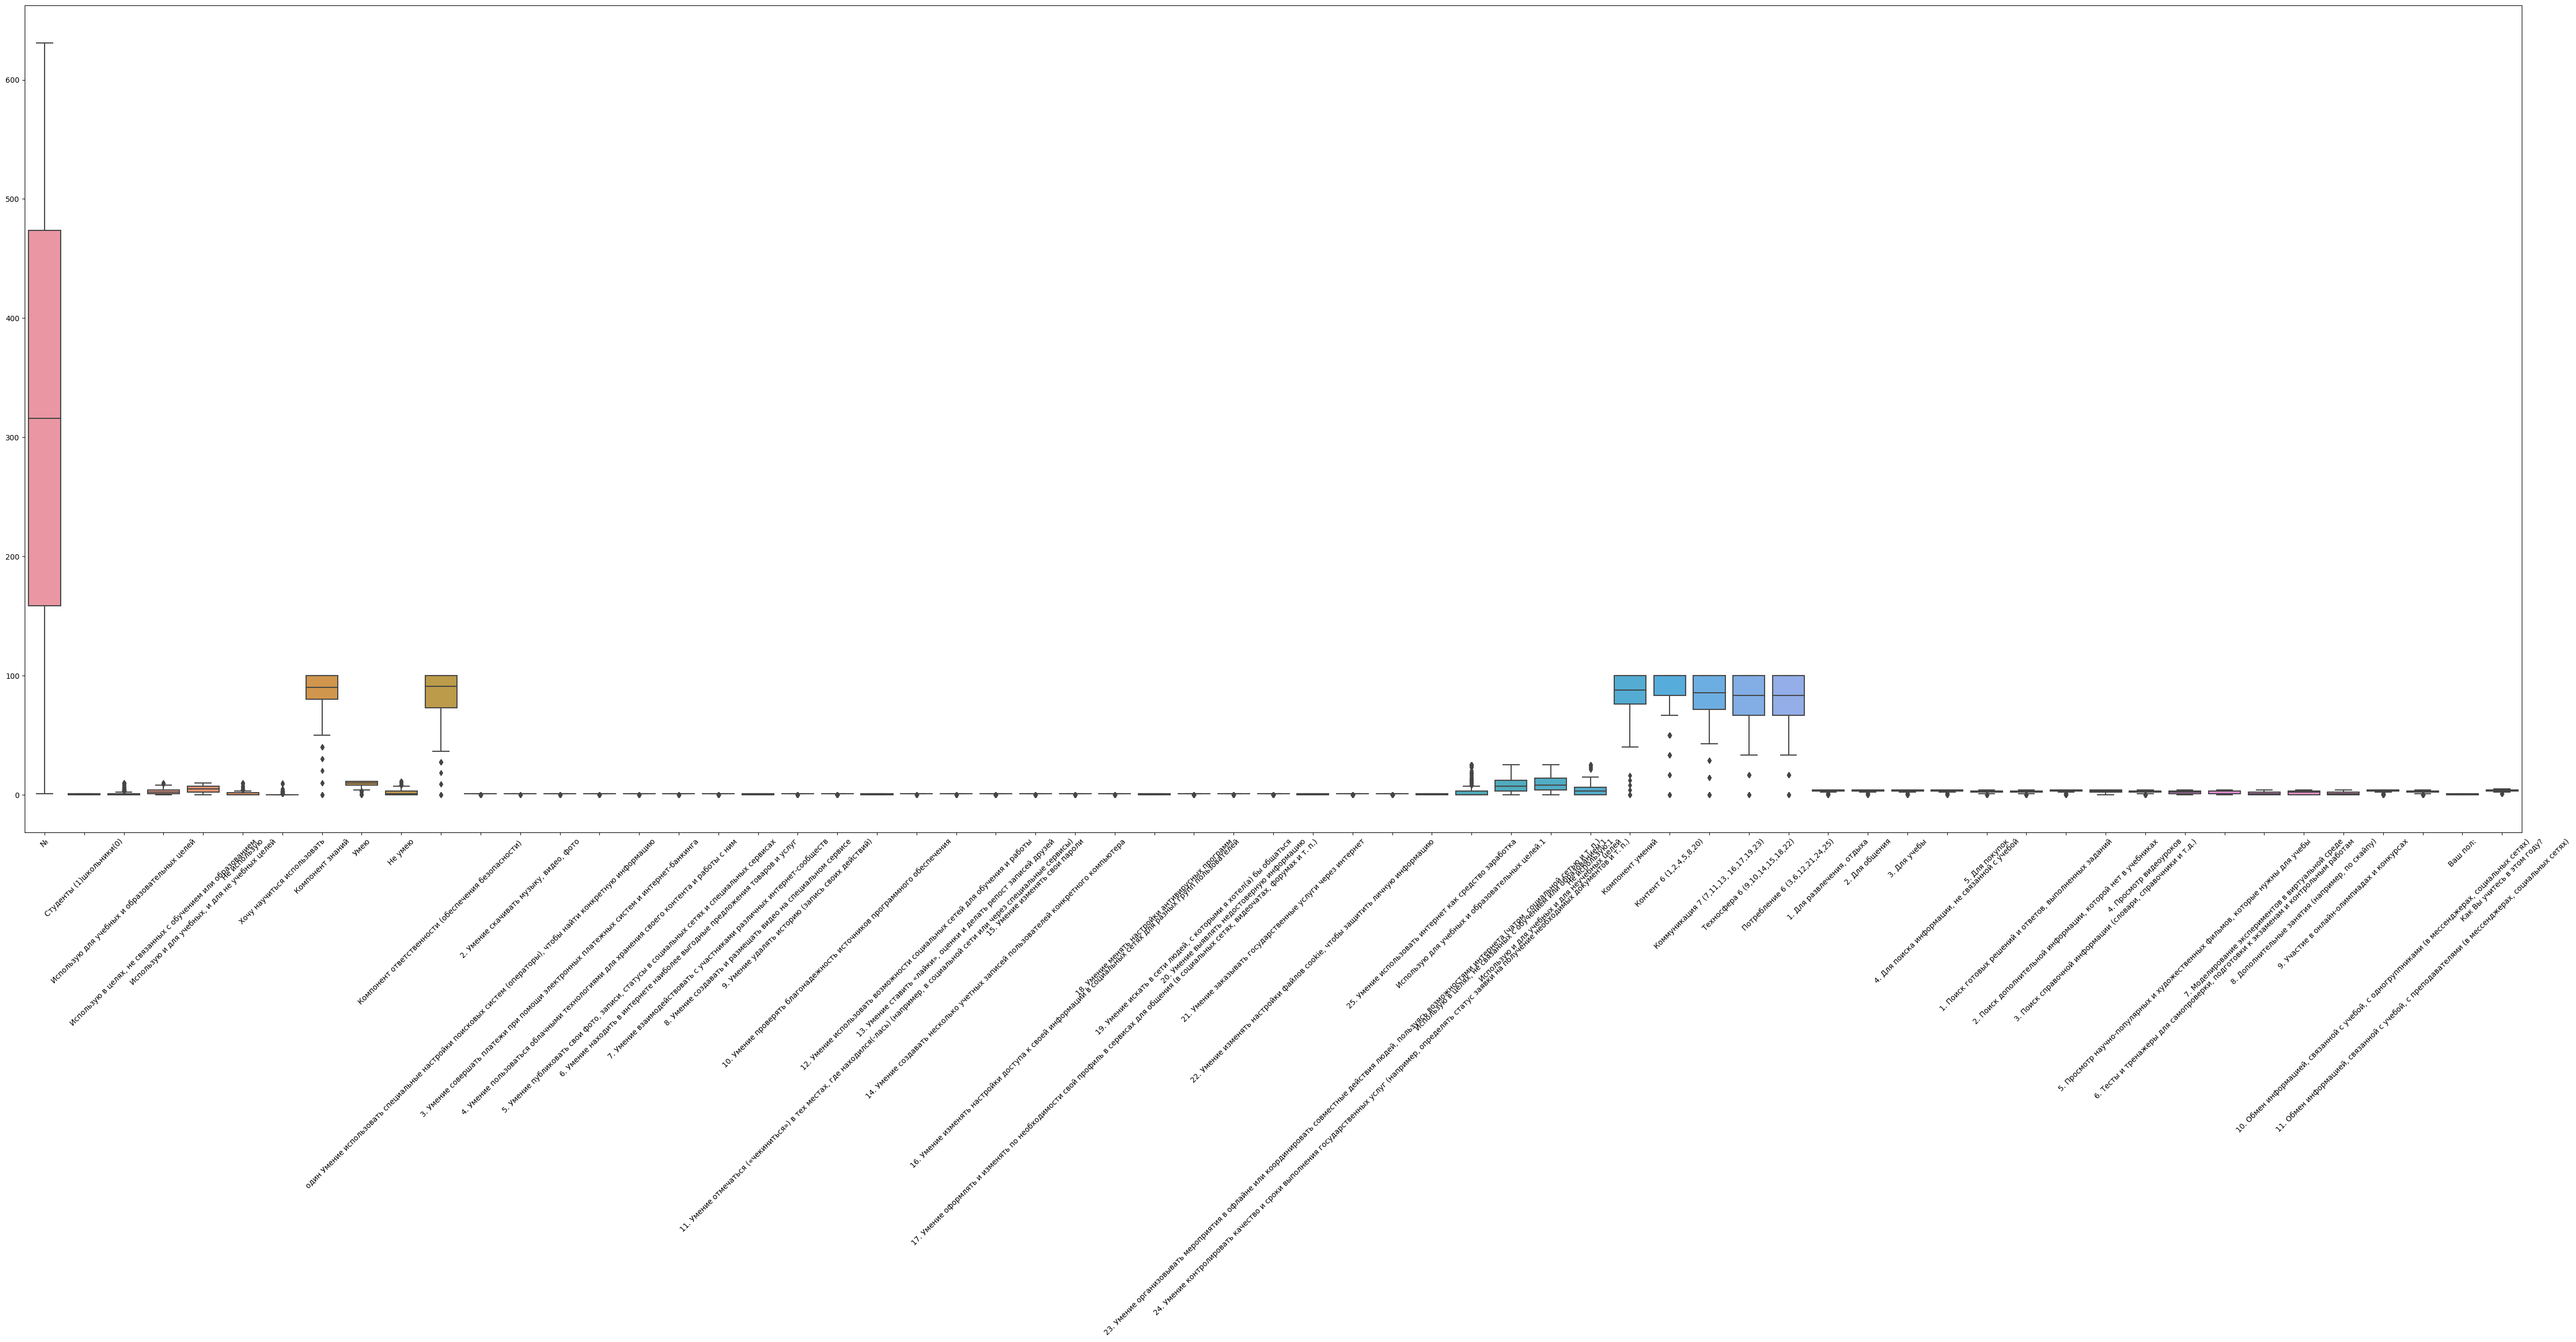

In [ ]:
fig,ax = plt.subplots(1,figsize=(60, 20))

ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

In [ ]:
import pandas as pd

# Create an empty DataFrame to store the outliers
outliers_df = pd.DataFrame(columns=['Variable', 'Outlier Values'])

# Calculate and store the outliers for each variable
for column in data.columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    if not outliers.empty:
        outliers_df = outliers_df.append({'Variable': column, 'Outlier Values': outliers.tolist()}, ignore_index=True)

# Display the table with outliers
print("Outliers Table:")
display(HTML(outliers_df.to_html()))


Outliers Table:


<ipython-input-8-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'Variable': column, 'Outlier Values': outliers.tolist()}, ignore_index=True)
<ipython-input-8-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'Variable': column, 'Outlier Values': outliers.tolist()}, ignore_index=True)
<ipython-input-8-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'Variable': column, 'Outlier Values': outliers.tolist()}, ignore_index=True)
<ipython-input-8-2443add9f9b2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

,Variable,Outlier Values
0,Ф.внимания,"[41, 42, 11, 14, 12, 13, 14, 12, 42, 12, 13, 12]"
1,К.атрибуция,"[11, 12, 9, 6, 10, 6, 12, 12, 6, 12, 6]"
2,Тол. к противор.,"[12, 9, 12, 7, 12, 11, 42, 12, 10, 12, 13, 12]"
3,В.изменений,"[38, 40, 12, 38, 12, 39]"
4,Общий пок. А/Х,"[75, 70, 62, 72, 66, 68, 66, 72, 66]"
5,Неуч.знания,"[10, 9, 10, 9, 10, 10]"
6,Комп.знания,"[20, 40, 30, 0, 0, 40, 30, 10, 0, 40, 40, 40, 10, 30, 10, 40, 0]"
7,Ответств.,"[18.18, 27.27, 27.27, 27.27, 27.27, 27.27, 0.0, 27.27, 0.0, 9.09, 27.27, 27.27, 0.0, 27.27, 9.09, 0.0]"
8,Неуч.умения,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25]"
9,Комп. Умения,"[16, 8, 4, 0, 0, 0, 0, 12, 0]"


In [ ]:
import pandas as pd

# Create an empty dictionary to store the count of outliers for each variable
outlier_counts = {}

# Calculate and store the count of outliers for each variable
for column in data.columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    outlier_counts[column] = len(outliers)

# Create a DataFrame with variable names and outlier counts
outliers_df = pd.DataFrame(list(outlier_counts.items()), columns=['Variable', 'Outlier Count'])

# Sort the DataFrame by outlier count in descending order
outliers_df = outliers_df.sort_values(by='Outlier Count', ascending=False)

# Display the sorted table
print("Variables with Outlier Counts (Sorted):")
display(outliers_df)


Variables with Outlier Counts (Sorted):


,Variable,Outlier Count
29,"10. Обмен информацией, связанной с учебой, с о...",63
21,"2. Поиск дополнительной информации, которой не...",50
20,"1. Поиск готовых решений и ответов, выполненны...",36
23,4. Просмотр видеоуроков,31
10,Комп.знания,17
11,Ответств.,16
16,Контент,15
15,Техносфера,15
18,Коммуникация,14
12,Неуч.умения,12


In [4]:
! pip install factor-analyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 775.1 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 37.5 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=a926e00304bf83cb9ffbb67f9c43433b7698c98827f529b1a4cdbf381c7bed26
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor-analyzer


In [ ]:
# path to file in google drive

file_pupils = "/content/gdrive/My Drive/Colab Notebooks/pupils.csv"
pupils = pd.read_csv(file_pupils)
pupils

,№,Студенты (1)школьники(0),Использую для учебных и образовательных целей,"Использую в целях, не связанных с обучением или образованием","Использую и для учебных, и для не учебных целей",Не использую,Компонент знаний,Умею,Не умею,Компонент ответственности (обеспечения безопасности),...,"6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",Ваш пол:,Ваш возраст:,Как Вы учитесь в этом году?,"Какое техническое устройство Вы предпочитаете использовать для того, чтобы искать в интернете информацию, необходимую для выполнения учебных заданий? Выберите один вариант, который для Вас наиболее предпочтителен:1 смартфон,2 комп/ноут,3 планшет"
0,307,0,1,4,4,1,90,6,5,54.55,...,4,0,4,4,4,4,0,18,3,1
1,308,0,0,2,8,0,100,10,1,90.91,...,2,2,1,1,3,1,0,15,4,1
2,309,0,9,1,0,0,100,8,3,72.73,...,4,4,4,4,4,4,0,18,4,1
3,310,0,3,3,2,1,80,11,0,100.00,...,4,2,4,4,4,1,1,15,5,1
4,311,0,5,2,2,1,90,11,0,100.00,...,1,1,1,4,0,0,1,15,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,565,0,10,0,0,0,100,11,0,100.00,...,0,0,0,0,0,0,1,18,4,1
259,566,0,0,1,8,1,90,9,2,81.82,...,2,2,2,2,2,2,0,15,2,1
260,567,0,2,1,2,3,50,6,5,54.55,...,3,4,2,4,4,1,0,14,3,1
261,568,0,1,0,9,0,100,10,1,90.91,...,3,0,2,0,2,4,0,16,3,1


In [ ]:
# path to file in google drive

file_students = "/content/gdrive/My Drive/Colab Notebooks/students.csv"
students = pd.read_csv(file_students)
students

,№,Студенты (1)школьники(0),Использую для учебных и образовательных целей,"Использую в целях, не связанных с обучением или образованием","Использую и для учебных, и для не учебных целей",Не использую,Компонент знаний,Умею,Не умею,Компонент ответственности (обеспечения безопасности),...,"6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",Ваш пол:,Ваш возраст:,Как Вы учитесь в этом году?,"Какое техническое устройство Вы предпочитаете использовать для того, чтобы искать в интернете информацию, необходимую для выполнения учебных заданий? Выберите один вариант, который для Вас наиболее предпочтителен:1 смартфон,2 комп/ноут,3 планшет"
0,1,1,3,2,5,0,100,7,4,63.64,...,2,0,0,1,3,3,0,19,4,1
1,2,1,0,4,5,1,90,4,7,36.36,...,0,0,1,0,3,2,0,22,5,1
2,3,1,0,3,4,3,70,6,5,54.55,...,0,0,0,0,3,3,0,18,5,1
3,4,1,0,3,7,0,100,10,1,90.91,...,2,1,2,3,3,0,0,24,5,2
4,5,1,0,2,8,0,100,9,2,81.82,...,1,2,0,2,4,2,0,22,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,302,1,0,0,9,0,90,11,0,100.00,...,2,2,2,1,3,2,0,24,5,2
302,303,1,1,1,7,0,90,10,1,90.91,...,0,0,0,1,3,1,1,21,4,2
303,304,1,0,0,9,0,90,7,4,63.64,...,3,0,2,0,3,3,0,20,4,1
304,305,1,0,2,8,0,100,11,0,100.00,...,2,0,0,0,4,2,0,19,4,1


/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


Total 17.58% Cumulative Variance explained by the 1 factors
Total 29.67% Cumulative Variance explained by the 2 factors
Total 38.54% Cumulative Variance explained by the 3 factors
Total 46.09% Cumulative Variance explained by the 4 factors
Total 50.11% Cumulative Variance explained by the 5 factors
Total 53.39% Cumulative Variance explained by the 6 factors
Total 58.61% Cumulative Variance explained by the 7 factors
Total 62.27% Cumulative Variance explained by the 8 factors
Total 60.86% Cumulative Variance explained by the 9 factors
Total 59.17% Cumulative Variance explained by the 10 factors
Total 58.99% Cumulative Variance explained by the 11 factors
Total 59.17% Cumulative Variance explained by the 12 factors
Total 59.29% Cumulative Variance explained by the 13 factors
Total 59.29% Cumulative Variance explained by the 14 factors
Factor Loadings Table:


,Factor 1,Factor 2,Factor 3
Студенты/школьники,0.700891,0.260741,-0.003574
Крит.стиль,0.176029,-0.072486,0.479785
Упр.стиль,0.284315,0.090533,0.401498
Практ.стиль,0.099376,0.039516,0.401619
Обуч.,0.103431,-0.168180,0.444030
Р.уч.акт.,0.555560,-0.013984,0.288647
Техносфера,-0.334202,0.242742,0.518974
Коммуникация,0.039294,0.331667,0.484019
Потребление,-0.110794,0.380105,0.551596
2. Для общения,0.110563,0.581553,0.022987


Bartlett’s Test:
Chi-Square Value: 2300.4118225433044
P-value: 0.0

Kaiser-Meyer-Olkin (KMO) Test:
KMO Overall: [0.58628    0.726606   0.81993297 0.76808642 0.55458806 0.75106078
 0.6336746  0.77609583 0.70925105 0.73343718 0.80200406 0.74486332
 0.76322769 0.61232402]
KMO Model: 0.6959450221313731


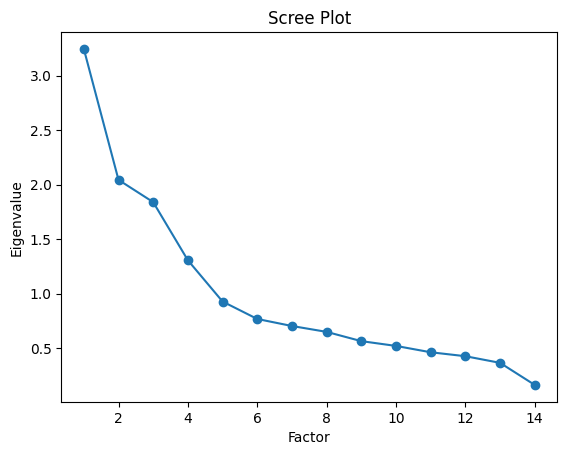

Descriptive Statistics:


,Студенты/школьники,Крит.стиль,Упр.стиль,Практ.стиль,Обуч.,Р.уч.акт.,Техносфера,Коммуникация,Потребление,2. Для общения,3. Для учебы,"4. Для поиска информации, не связанной с учебой",5. Для покупок,Оценки в этом году
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,0.523156,21.802744,22.164666,21.963979,29.703259,34.723842,77.281990,87.198971,83.313585,4.132075,4.005146,4.202401,3.692967,3.053173
std,0.499892,2.991487,3.473066,3.184003,8.050278,9.124430,19.939570,17.010722,18.120374,0.895608,0.925938,0.865645,1.061705,1.148248
min,0.000000,11.000000,11.000000,11.000000,10.000000,10.000000,0.000000,0.000000,5.560000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,20.000000,20.000000,20.000000,25.000000,28.000000,66.670000,77.780000,72.220000,4.000000,4.000000,4.000000,3.000000,2.000000
50%,1.000000,22.000000,22.000000,22.000000,30.000000,34.000000,77.780000,90.480000,88.890000,4.000000,4.000000,4.000000,4.000000,3.000000
75%,1.000000,24.000000,25.000000,24.000000,35.000000,42.000000,94.440000,100.000000,100.000000,5.000000,5.000000,5.000000,4.000000,4.000000
max,1.000000,30.000000,32.000000,32.000000,50.000000,50.000000,100.000000,133.330000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000
Skewness,-0.092963,-0.151761,-0.181849,-0.018662,0.076238,-0.090997,-0.687225,-1.228969,-1.185471,-1.083163,-0.987532,-1.136669,-0.633665,-0.199861
Kurtosis,-1.998225,0.039826,-0.295722,0.260162,0.004805,-0.724723,-0.135462,3.555635,1.128176,1.081478,0.990590,1.368633,-0.131918,-0.833181


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from IPython.display import display, HTML

# Assume you have loaded your data into the 'data' DataFrame


#Specify the variables you want to include in the factor analysis
selected_variables = [
       'Студенты/школьники',

       #'Иниц.стиль',
       'Крит.стиль', 'Упр.стиль',
       'Практ.стиль',

       #'Ф.внимания', 'К.атрибуция', 'Тол. к противор.',
       #'В.изменений',
       #'Общий пок. А/Х',

       #'Акт.', 'Рефл.', 'А-К', 'Чув.', 'Инт.',
       #'Ч-И', 'Виз.стиль', 'Верб.стиль', 'Виз.-Верб.', 'Ан.', 'Син.', 'А-С',

       'Обуч.', 'Р.уч.акт.',

       #'Проц.навыки', 'Металл.', 'Метка.контроль',
       #'Сниж.рефл',
       #'Степ.осозн.',

       #'Уч.знания', 'Неуч.знания',
       #'Уч.и Неуч. Знания',
       #'Комп.знания',
       #'Ответств.',
       #'Комп. Умения',
       #'Контент',
       'Техносфера',
       'Коммуникация',
       'Потребление',

       #'1. Использование смартфона помогает мне расслабиться, когда я взволнован(а) или расстроен(а).',
       #'2. Использование смартфона помогает мне снять напряжение, когда я устал(а) и хочу отдохнуть.',
       #'3. С помощью смартфона я могу хотя бы на время отвлечься от ежедневных обязанностей и забот.',
       #'4. Использование смартфона помогает мне общаться с людьми, когда я чувствую себя одиноким(кой).',
       #'5. Использование моего смартфона отвлекает мой разум от проблем.',
       #'6. Я трачу на использование смартфона непозволительно много времени.',
       #'7. Я часто продолжаю пользоваться своим смартфоном, несмотря на мысли о том, что было бы лучше прекратить.',
       #'8. Использование смартфона наносит урон моему здоровью и/или эмоциональному благополучию.',
       #'9. Если со мной нет моего смартфона, мысли об этом становятся навязчивыми.',
       #'10. Использование смартфона вредит моей учебе.',

       #'1. Для развлечения, отдыха',
       '2. Для общения',
       '3. Для учебы',
       '4. Для поиска информации, не связанной с учебой',
       '5. Для покупок',

       #'1. Поиск готовых решений и ответов, выполненных заданий',
       #'2. Поиск дополнительной информации, которой нет в учебниках',
       #'3. Поиск справочной информации (словари, справочники и т.д.)',
       #'4. Просмотр видеоуроков',
       #'5. Просмотр научно-популярных и художественных фильмов, которые нужны для учебы',
       #'6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам',
       #'7. Моделирование экспериментов в виртуальной среде',
       #'8. Дополнительные занятия (например, по скайпу)',
       #'9. Участие в онлайн-олимпиадах и конкурсах',
       #'10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)',
       #'11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)',

       #'пол',
       #'возраст',
       'Оценки в этом году'
]  # Replace with the actual variable names you want to include


selected_data = data[selected_variables]

# Create a new DataFrame with only the selected variables
#selected_data = data[selected_variables]

# Specify the number of factors you want to extract
num_factors = 3

# Calculate the cumulative variance explained by factors
cumulative_variance_explained = []
for i in range(1, len(selected_variables) + 1):
    factor_analyzer = FactorAnalyzer(rotation='varimax', method='uls', n_factors=i)
    factor_analyzer.fit(selected_data)
    fa_var = factor_analyzer.get_factor_variance()
    total_cum_variance = fa_var[-1][-1]  # Access the last element of the array
    cumulative_variance_explained.append(total_cum_variance)

    #The rotation must be one of the following: ['varimax', !'oblimax', !'quartimax', 'equamax',
    #'geomin_ort', 'promax', 'oblimin', !'quartimin', 'geomin_obl', None]

# Print the cumulative variance explained by factors
for i, variance_explained in enumerate(cumulative_variance_explained):
    print(f"Total {variance_explained * 100:.2f}% Cumulative Variance explained by the {i + 1} factors")

# Initialize the factor analyzer with the desired number of factors
factor_analyzer = FactorAnalyzer(rotation='varimax', n_factors=num_factors, method='uls')

# Fit the model to your selected data
factor_analyzer.fit(selected_data)

# Get the factor loadings
factor_loadings = factor_analyzer.loadings_

# Create a pandas DataFrame from the factor loadings
factor_loading_df = pd.DataFrame(factor_loadings, columns=[f'Factor {i+1}' for i in range(num_factors)], index=selected_data.columns)

# Print the factor loadings table with grid lines using HTML
print("Factor Loadings Table:")
display(HTML(factor_loading_df.to_html()))

# Bartlett’s Test
chi_square_value, p_value = calculate_bartlett_sphericity(selected_data)
print("Bartlett’s Test:")
print("Chi-Square Value:", chi_square_value)
print("P-value:", p_value)

# Kaiser-Meyer-Olkin (KMO) Test
kmo_all, kmo_model = calculate_kmo(selected_data)
print("\nKaiser-Meyer-Olkin (KMO) Test:")
print("KMO Overall:", kmo_all)
print("KMO Model:", kmo_model)

# Scree Plot
ev, v = factor_analyzer.get_eigenvalues()
plt.plot(range(1, len(ev) + 1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.show()


# Calculate basic descriptive statistics for the selected data
descriptive_stats = selected_data.describe()

# Calculate skewness for each variable
skewness = selected_data.skew()

# Calculate kurtosis for each variable
kurtosis_value = selected_data.kurtosis()

# Add skewness and kurtosis to the descriptive statistics DataFrame
descriptive_stats.loc['Skewness'] = skewness
descriptive_stats.loc['Kurtosis'] = kurtosis_value

# Print the descriptive statistics
print("Descriptive Statistics:")
display(HTML(descriptive_stats.to_html()))

In [75]:
# Filter factor loadings to keep values higher than 0.3
filtered_factor_loading_df = factor_loading_df[factor_loading_df.abs() > 0.30]

# Replace NaN values with empty strings for better readability
filtered_factor_loading_df = filtered_factor_loading_df.fillna("")

# Print the filtered factor loadings table with grid lines using HTML
print("Filtered Factor Loadings Table (Values > 0.4):")
display(HTML(filtered_factor_loading_df.to_html()))

Filtered Factor Loadings Table (Values > 0.4):


,Factor 1,Factor 2,Factor 3
Студенты/школьники,0.700891,,
Крит.стиль,,,0.479785
Упр.стиль,,,0.401498
Практ.стиль,,,0.401619
Обуч.,,,0.44403
Р.уч.акт.,0.55556,,
Техносфера,-0.334202,,0.518974
Коммуникация,,0.331667,0.484019
Потребление,,0.380105,0.551596
2. Для общения,,0.581553,


In [ ]:
# Calculate Communalities from factor analysis results
communalities = factor_analyzer.get_communalities()
communalities_df = pd.DataFrame(communalities, columns=["Communalities"], index=selected_data.columns)

# Print the Communalities table with grid lines using HTML
print("Communalities Table:")
display(HTML(communalities_df.to_html()))

Communalities Table:


,Communalities
Школьник/студент,0.161821
Ф.внимания,0.368944
К.атрибуция,0.519338
Тол. к противор.,0.366625
Общий пок. А/Х,1.065513
Контент,0.510658
Техносфера,0.595526
Потребление,0.582359
2. Для общения,0.384541
3. Для учебы,0.446735


In [ ]:
import numpy as np

# Define a function to calculate Cronbach's Alpha
def cronbach_alpha(items):
    num_items = items.shape[1]

    # Calculate the covariance matrix
    cov_matrix = np.cov(items, rowvar=False)

    # Calculate the mean for each item
    item_means = np.mean(items, axis=0)

    # Calculate the overall variance of the scale
    scale_variance = np.var(items)

    # Calculate Cronbach's Alpha
    alpha = (num_items / (num_items - 1)) * (1 - (scale_variance / cov_matrix.sum()))

    return alpha

# Calculate Cronbach's Alpha for all selected variables
cronbach_alpha_value = cronbach_alpha(selected_data.to_numpy())

# Print the Cronbach's Alpha value for all selected variables
print("Cronbach's Alpha for Selected Variables (as a scale):", cronbach_alpha_value)

Cronbach's Alpha for Selected Variables (as a scale): 0.8346833763986079


In [ ]:
import numpy as np
import pandas as pd

# Define a function to calculate Cronbach's Alpha
def cronbach_alpha(items):
    num_items = items.shape[1]

    # Calculate the covariance matrix
    cov_matrix = np.cov(items, rowvar=False)

    # Calculate the mean for each item
    item_means = np.mean(items, axis=0)

    # Calculate the overall variance of the scale
    scale_variance = np.var(items)

    # Calculate Cronbach's Alpha
    alpha = (num_items / (num_items - 1)) * (1 - (scale_variance / cov_matrix.sum()))

    return alpha

# Initialize a dictionary to store results
alpha_values = {}

# Calculate Cronbach's Alpha for all selected variables
cronbach_alpha_all = cronbach_alpha(selected_data.to_numpy())

# Iterate over each variable, temporarily removing it and calculating Cronbach's Alpha
for column in selected_data.columns:
    # Create a copy of the data with the current variable removed
    data_without_variable = selected_data.drop(columns=[column]).to_numpy()

    # Calculate Cronbach's Alpha without the current variable
    cronbach_alpha_without_variable = cronbach_alpha(data_without_variable)

    # Store the result in the dictionary
    alpha_values[column] = cronbach_alpha_without_variable

# Create a DataFrame to display the Cronbach's Alpha values if each item is deleted
alpha_table = pd.DataFrame.from_dict(alpha_values, orient='index', columns=['Cronbach Alpha if Item Deleted'])

# Print the table
print("Cronbach's Alpha if Item Deleted:")
display(alpha_table)

Cronbach's Alpha if Item Deleted:


,Cronbach Alpha if Item Deleted
Студенты (1)школьники(0),0.796698
"Использую в целях, не связанных с обучением или образованием",0.796955
"Использую и для учебных, и для не учебных целей",0.791831
Компонент ответственности (обеспечения безопасности),0.770534
"Использую в целях, не связанных с обучением или образованием.1",0.791998
Использую и для учебных и для неучебных целей,0.775273
"Техносфера 6 (9,10,14,15,18,22)",0.649455
"Потребление 6 (3,6,12,21,24,25)",0.728386
3. Для учебы,0.794457
"4. Для поиска информации, не связанной с учебой",0.794588


In [ ]:
! pip install pingouin


In [ ]:
import pingouin as pg

# Initialize a list to store Cronbach's Alpha values for each factor
cronbach_alpha_values = []

# Loop through each factor
for i in range(num_factors):
    # Extract the items (variables) that load on the factor based on factor loadings
    factor_loadings = factor_loading_df[f'Factor {i+1}']
    factor_items = selected_data.columns[abs(factor_loadings) >= 0.30]

    # Filter the selected data to include only the items for this factor
    factor_data = selected_data[factor_items]

    # Calculate Cronbach's Alpha for the factor
    alpha_result = pg.cronbach_alpha(factor_data)

    # Append the Alpha value to the list
    cronbach_alpha_values.append(alpha_result[0])  # Access the first element of the tuple

# Print Cronbach's Alpha values for each factor
for i, alpha in enumerate(cronbach_alpha_values):
    print(f"Cronbach's Alpha for Factor {i+1}: {alpha:.2f}")


Cronbach's Alpha for Factor 1: 0.51
Cronbach's Alpha for Factor 2: 0.14
Cronbach's Alpha for Factor 3: 0.45
Cronbach's Alpha for Factor 4: 0.59
